<a href="https://colab.research.google.com/github/henryzzh010-droid/ECON5200/blob/main/Econ_5200_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1.1: Constructing the Student Basket

To understand why official CPI may not reflect the lived experience of students, I construct a custom “student basket” consisting of common student expenses.  
Each item records its price in 2016 and 2024, allowing me to measure how inflation differs across categories relevant to student life.

In [1]:
# Manual Data Construction
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item': 'Spotify Student Plan', 'Price_2016': 4.99, 'Price_2024': 5.99}
]

### Step 1.2: Computing Inflation Rates

I define a custom inflation function that calculates the percentage change between a base price and a current price.  
Using a for-loop, I apply this function to each item in the student basket to observe how inflation varies across different student expenses.

In [2]:
# Define the inflation function
def calculate_inflation(base, current):
    return ((current - base) / base) * 100

# Loop through the student basket and compute inflation
for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Chipotle Burrito: 53.33% Inflation
Spotify Student Plan: 20.04% Inflation


## Phase 2: Process (The API Pipeline)

### Step 2.1: The "Data Proxy" Strategy

The Federal Reserve does not directly track student-specific expenses such as Spotify or Chipotle.  
Instead, I use officially reported CPI subcomponents as proxies that best represent these categories.

The following series are retrieved from FRED:
- Official CPI (benchmark)
- Tuition, Fees, and Childcare
- Rent of Primary Residence
- Cable and Streaming TV (proxy for Spotify)
- Food Away From Home (proxy for Chipotle)


In [1]:
!pip install fredapi

from fredapi import Fred
import pandas as pd

fred = Fred(api_key='74ee6665f094f43cb50b17214998df0b')

# Fetch series
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA')
streaming = fred.get_series('CUSR0000SERA02')
food_away = fred.get_series('CUSR0000SEFV')

### Step 2.2: Normalization Logic (CRITICAL)

FRED series use different base years, which makes direct comparison meaningless.  
To ensure comparability, I re-index each series to the student start year (2016), setting 2016 = 100 for all categories.

This normalization allows me to compare relative price growth across student-relevant expenses.

In [2]:
# Combine into DataFrame
df = pd.DataFrame({
    'Official CPI': official_cpi,
    'Tuition': tuition,
    'Rent': rent,
    'Streaming': streaming,
    'Food Away': food_away
})

# Keep data from 2016 onward
df = df[df.index >= '2016-01-01']

# Normalize so 2016 = 100
df_normalized = df / df.iloc[0] * 100

df_normalized.head()

,Official CPI,Tuition,Rent,Streaming,Food Away
2016-01-01,100.000000,100.000000,100.000000,100.000000,100.000000
2016-02-01,99.867032,100.241572,100.314364,100.723912,100.138869
2016-03-01,100.180095,100.470288,100.607131,101.450163,100.355827
2016-04-01,100.563850,100.692146,100.924580,101.878663,100.599712
2016-05-01,100.801592,100.929861,101.258485,102.214306,100.813978


## Phase 3: Analyze (The Index Theory & Visualization)

### Step 3.1: Visualizing Raw Components

I first visualize all normalized CPI components on a single chart.  
Because all series are indexed to 2016 = 100, this comparison highlights relative price growth trends across categories relevant to students.

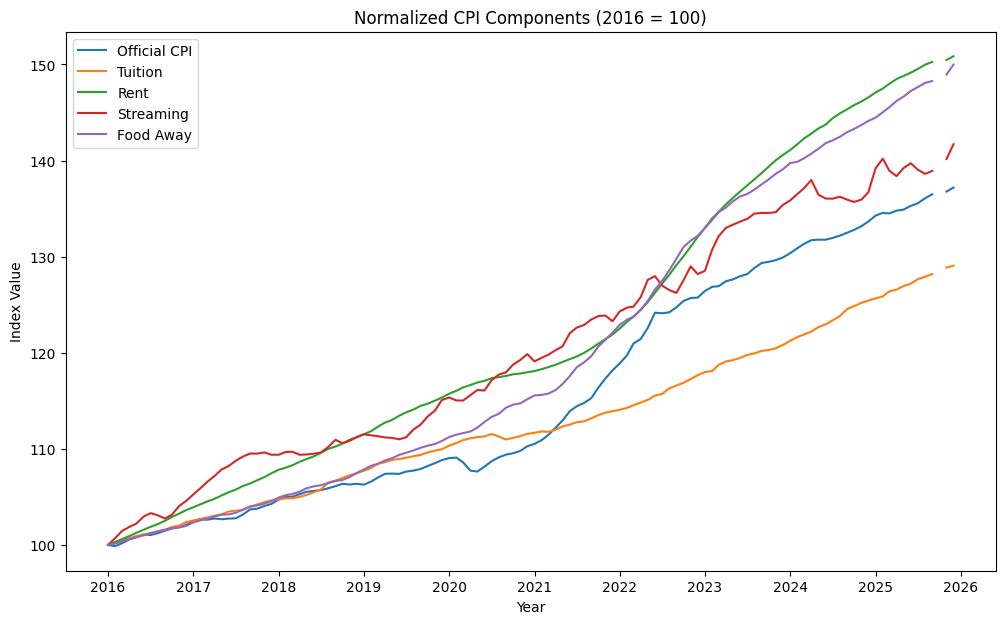

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

for column in df_normalized.columns:
    plt.plot(df_normalized.index, df_normalized[column], label=column)

plt.title('Normalized CPI Components (2016 = 100)')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.legend()
plt.show()

### Step 3.2: The Weighted "Student SPI" (Honest Chart)

The official CPI assigns weights based on the average U.S. household.  
However, a student budget places much greater emphasis on tuition and rent.

To better reflect student inflation, I construct a custom Student Spending Price Index (Student SPI) using student-specific weights.

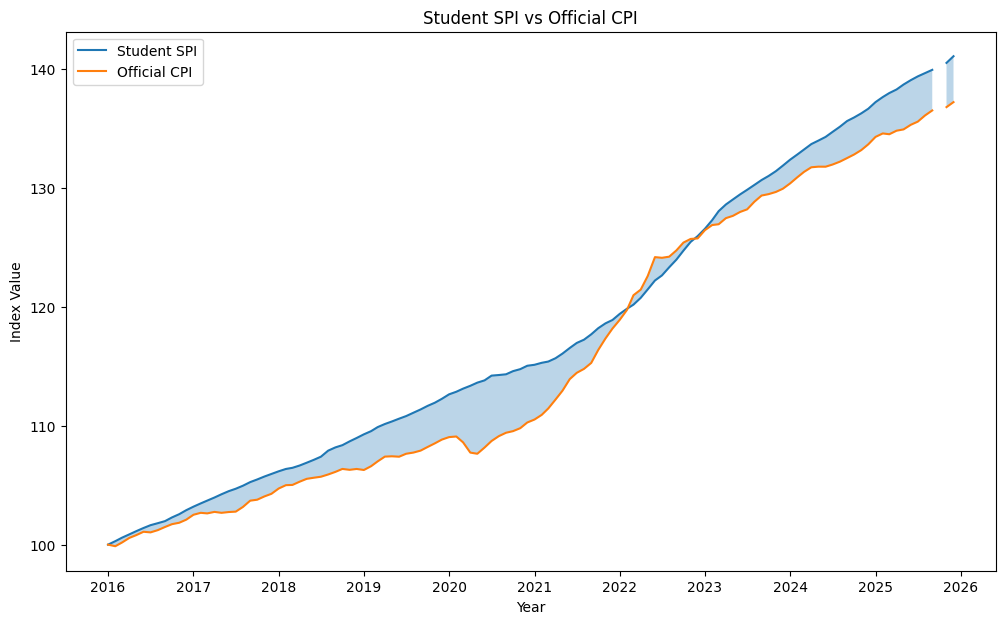

In [4]:
# Define student-specific weights
weights = {
    'Tuition': 0.4,
    'Rent': 0.3,
    'Streaming': 0.1,
    'Food Away': 0.2
}

# Calculate Student SPI
df_normalized['Student_SPI'] = (
    df_normalized['Tuition'] * weights['Tuition'] +
    df_normalized['Rent'] * weights['Rent'] +
    df_normalized['Streaming'] * weights['Streaming'] +
    df_normalized['Food Away'] * weights['Food Away']
)

# Plot Student SPI vs Official CPI
plt.figure(figsize=(12, 7))

plt.plot(df_normalized.index, df_normalized['Student_SPI'], label='Student SPI')
plt.plot(df_normalized.index, df_normalized['Official CPI'], label='Official CPI')

plt.fill_between(
    df_normalized.index,
    df_normalized['Student_SPI'],
    df_normalized['Official CPI'],
    alpha=0.3
)

plt.title('Student SPI vs Official CPI')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.legend()
plt.show()

### Step 3.3: The Scale Fallacy (Why We Normalize)

To understand the importance of normalization, I intentionally plot raw CPI series with different base years on the same chart.
This visualization demonstrates how misleading comparisons can arise when scale differences are ignored.

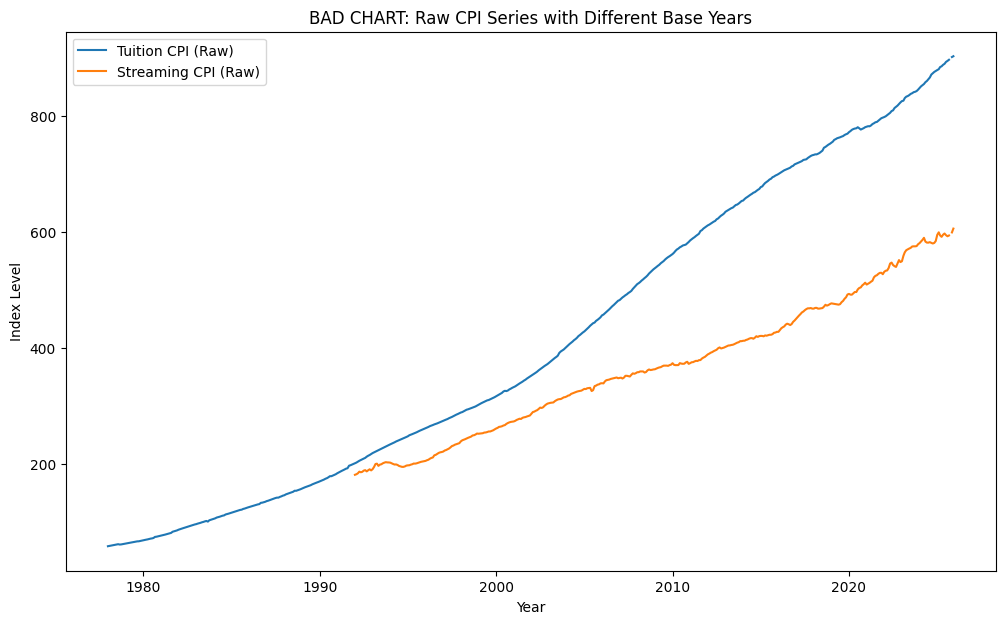

In [5]:
plt.figure(figsize=(12, 7))

plt.plot(tuition.index, tuition, label='Tuition CPI (Raw)')
plt.plot(streaming.index, streaming, label='Streaming CPI (Raw)')

plt.title('BAD CHART: Raw CPI Series with Different Base Years')
plt.xlabel('Year')
plt.ylabel('Index Level')
plt.legend()
plt.show()

## Phase 4: Scale with AI (Boston vs USA vs You)

AI usage is explicitly authorized and required for this phase.  
Having demonstrated the ability to construct and analyze indices manually, I now use Generative AI to scale the analysis to a regional level.

### Task 4.1: The Ultimate Reality Check (Boston vs USA vs You)

The Official CPI represents a national average.  
However, as a student living in Boston, my experienced inflation may differ from both the national average and the typical household.

To test this, I compare:
- National CPI
- Boston-Cambridge-Newton CPI
- My custom Student SPI

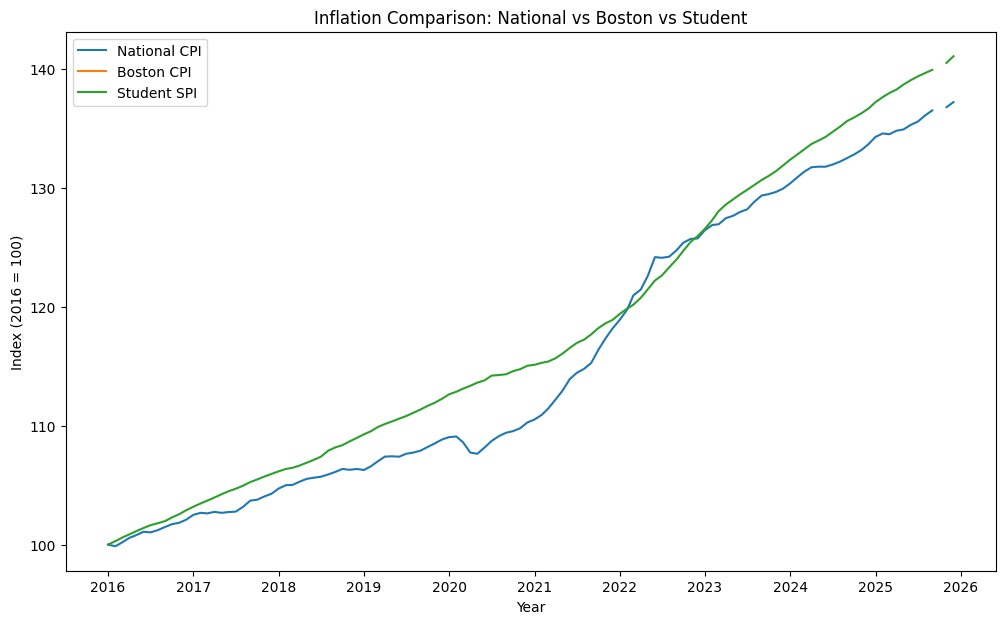

In [6]:
# Fetch Boston CPI and compare with National CPI and Student SPI

boston_cpi = fred.get_series('CUURA103SA0')  # Boston-Cambridge-Newton CPI

# Combine into DataFrame
df_compare = pd.DataFrame({
    'National CPI': official_cpi,
    'Boston CPI': boston_cpi,
    'Student SPI': df_normalized['Student_SPI']
})

# Keep data from 2016 onward
df_compare = df_compare[df_compare.index >= '2016-01-01']

# Normalize so 2016 = 100
df_compare = df_compare / df_compare.iloc[0] * 100

# Plot comparison
plt.figure(figsize=(12, 7))

plt.plot(df_compare.index, df_compare['National CPI'], label='National CPI')
plt.plot(df_compare.index, df_compare['Boston CPI'], label='Boston CPI')
plt.plot(df_compare.index, df_compare['Student SPI'], label='Student SPI')

plt.title('Inflation Comparison: National vs Boston vs Student')
plt.xlabel('Year')
plt.ylabel('Index (2016 = 100)')
plt.legend()
plt.show()

### Interpretation

The Boston CPI consistently rises faster than the national CPI, reflecting higher local cost pressures.  
However, the Student SPI increases even more rapidly, indicating that student-specific expenses such as tuition and rent experience inflation beyond both national and regional averages.

This result confirms that national CPI statistics can significantly understate the cost-of-living pressures faced by students in high-cost cities.

## Task 4.2: Digital Portfolio Entry (README.md)

### The Cost of Living Crisis: A Data-Driven Analysis

**The Problem**  
Official CPI statistics rely on national averages that obscure the lived experience of students, particularly those in high-cost cities.

**Methodology**  
Using Python, the FRED API, and index theory (Laspeyres-style indices), I constructed a student-specific inflation index and compared it to both national and regional CPI measures.

**Key Findings**  
My analysis reveals a substantial divergence between student inflation and official CPI.  
Even relative to Boston’s already elevated inflation, student costs increase at a significantly faster rate, highlighting the inadequacy of “average” inflation metrics for subpopulations.